<a href="https://colab.research.google.com/github/thaispatricio9/Bootcamp-machine-learning/blob/main/desafio_05_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Final

In [1]:
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

random_state = 42

scaler = StandardScaler()
pca = PCA(n_components=7)
kmeans = KMeans(n_clusters=3,random_state=random_state)
dtc = DecisionTreeClassifier(random_state=random_state)
lr = LogisticRegression(random_state=random_state)

In [2]:
url ='https://drive.google.com/uc?export=download&id=1Gjumb68_WrOOJr-7YUKH3yFk6rNJrHH2'
df = pd.read_csv(url)
df_original = df.copy()
df.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [4]:
cols = ['cubicinches', 'weightlbs']
#errors = coerce: Análise inválida será definida como NaN.
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [5]:
# Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.

df_original[df_original.cubicinches==' '].index

Int64Index([40, 180], dtype='int64')

In [6]:
# Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos passaram a existir no dataset?
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [8]:
df['cubicinches'].fillna(df.cubicinches.mean(), inplace=True)
df['weightlbs'].fillna(df.weightlbs.mean(), inplace=True)

df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [9]:
df.corr()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
mpg,1.000000,-0.776710,-0.802379,-0.774905,-0.823800,0.509070,0.550441
cylinders,-0.776710,1.000000,0.951246,0.845155,0.894447,-0.578161,-0.322239
cubicinches,-0.802379,0.951246,1.000000,0.906413,0.925288,-0.610679,-0.349743
hp,-0.774905,0.845155,0.906413,1.000000,0.857125,-0.744873,-0.383869
weightlbs,-0.823800,0.894447,0.925288,0.857125,1.000000,-0.477240,-0.278683
time-to-60,0.509070,-0.578161,-0.610679,-0.744873,-0.477240,1.000000,0.312311
year,0.550441,-0.322239,-0.349743,-0.383869,-0.278683,0.312311,1.000000


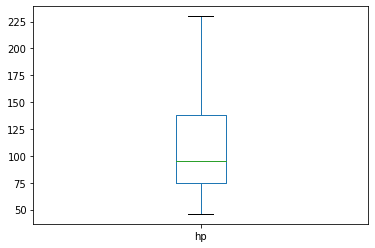

In [10]:
df['hp'].plot.box()

In [11]:
print('Antes: ',df.hp.max())
df.hp = scaler.fit_transform(df.hp.values.reshape(-1,1))
print('Depois: ',df.hp.max())

Antes:  230
Depois:  3.05870398977614


In [12]:
pca.fit(df[df.columns[:-1]])
pca.explained_variance_
pca.components_

array([[-7.54290397e-03,  1.81683306e-03,  1.18045838e-01,
         1.00629347e-03,  9.92975269e-01, -1.63313644e-03,
        -1.19153729e-03],
       [-1.96355544e-02,  1.35560601e-02,  9.91942502e-01,
         7.19468026e-03, -1.18182122e-01, -3.15535453e-02,
        -2.15950892e-02],
       [ 8.36629255e-01, -1.31787086e-03,  3.16138097e-02,
        -1.77279432e-02,  3.40719256e-03,  8.64910315e-02,
         5.39670022e-01],
       [-5.22848327e-01,  1.29868904e-02,  2.06788708e-03,
         4.55282298e-03, -3.50915446e-03, -1.62481900e-01,
         8.36673940e-01],
       [-1.61776932e-01, -1.85589127e-03,  3.02877827e-02,
        -1.20905261e-01, -2.99365701e-03,  9.74879806e-01,
         8.88242682e-02],
       [-8.14832542e-03, -9.82250976e-01,  1.27806847e-02,
         1.85634032e-01,  7.30148101e-05,  1.82502615e-02,
         1.26573238e-02],
       [-7.03686992e-04,  1.86606838e-01, -5.55415524e-03,
         9.74953404e-01, -4.59576621e-04,  1.19987220e-01,
         1.4671748

In [13]:
k = kmeans.fit(pca.components_[:3])
k.cluster_centers_

array([[-0.01963555,  0.01355606,  0.9919425 ,  0.00719468, -0.11818212,
        -0.03155355, -0.02159509],
       [-0.0075429 ,  0.00181683,  0.11804584,  0.00100629,  0.99297527,
        -0.00163314, -0.00119154],
       [ 0.83662926, -0.00131787,  0.03161381, -0.01772794,  0.00340719,
         0.08649103,  0.53967002]])

In [14]:
df['eficientes'] = 0
df.loc[df.mpg>25,'eficientes']=1
x = df[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']]
x = scaler.transform(x)
y =  df['eficientes']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=random_state)

In [15]:
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(random_state=random_state)
dtc = dtc.fit(xtrain,ytrain)
predicts  = dtc.predict(xtest)
accuracy_score(ytest,predicts)

0.8734177215189873

In [16]:
from sklearn.metrics import confusion_matrix
verdadeiro_negativo, falso_positivo, falso_negativo, verdadeiro_positivo = confusion_matrix(ytest,predicts).ravel()
print('verdadeiro_negativo:\t',verdadeiro_negativo)
print('falso_positivo:\t\t',falso_positivo)
print('falso_negativo:\t\t',falso_negativo)
print('verdadeiro_positivo:\t',verdadeiro_positivo)

verdadeiro_negativo:	 33
falso_positivo:		 8
falso_negativo:		 2
verdadeiro_positivo:	 36


In [17]:
lr = LogisticRegression(random_state=random_state) 
lr = lr.fit(xtrain,ytrain)
predicts  = lr.predict(xtest)
accuracy_score(ytest,predicts)

0.8227848101265823